In [30]:
 ## STEP 1-->Importing Libraries  and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
maintenance_data= pd.read_csv('predictive_maintenance.csv')

In [3]:
maintenance_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [31]:
# STEP 2-->PREPROCESSING

In [4]:
maintenance_data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

<Axes: xlabel='Failure Type', ylabel='Count'>

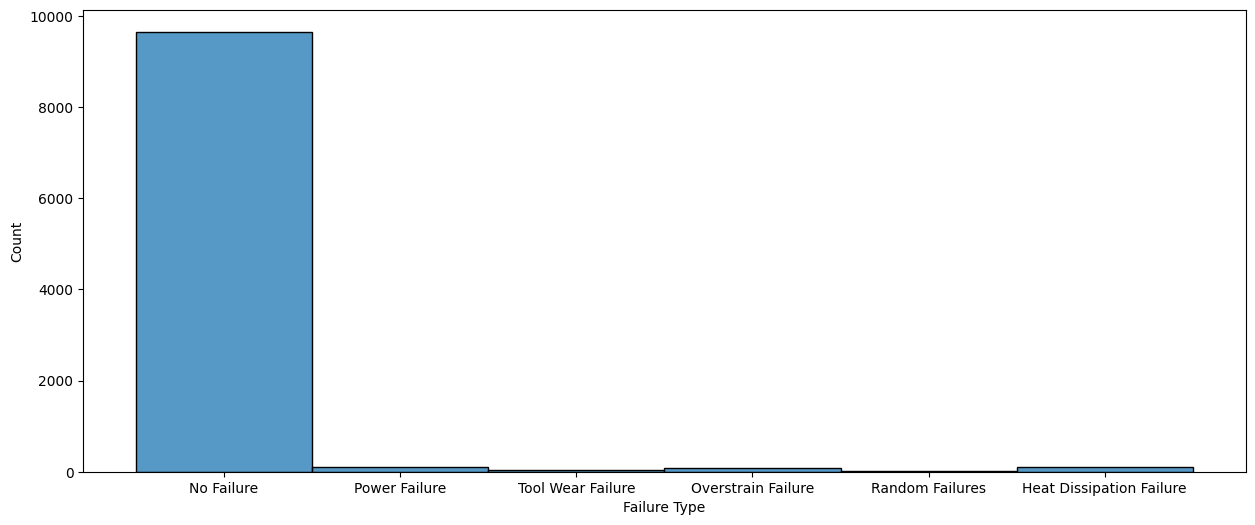

In [5]:
plt.figure(figsize=(15, 6))
sns.histplot(data=maintenance_data, x=maintenance_data['Failure Type'])


<Axes: xlabel='Target', ylabel='Count'>

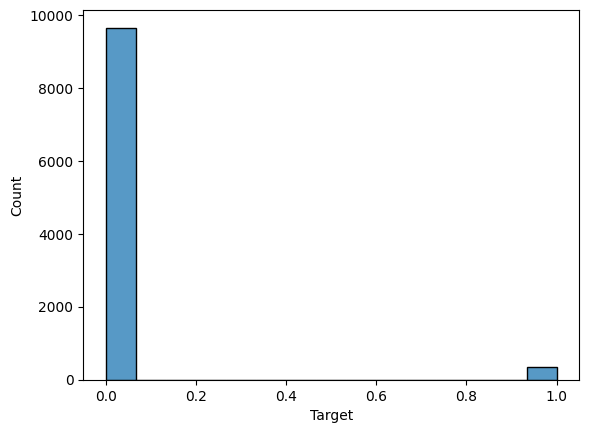

In [6]:

sns.histplot(data=maintenance_data, x=maintenance_data['Target'])

In [7]:
maintenance_data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [8]:
maintenance_data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [9]:
maintenance_data.rename(columns={'Process temperature [K]':'Machine Temperature [K]'}, inplace=True)

In [10]:
maintenance_data.head()

,UDI,Product ID,Type,Air temperature [K],Machine Temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
maintenance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Machine Temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [12]:
maintenance_data.describe()

,UDI,Air temperature [K],Machine Temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [13]:
maintenance_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Machine Temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [14]:
maintenance_data[maintenance_data['Target']==1]

,UDI,Product ID,Type,Air temperature [K],Machine Temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [15]:
maintenance_data.drop(columns=['UDI','Product ID','Target'],inplace=True)

In [16]:
maintenance_data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
oe = OrdinalEncoder(categories=[['L', 'M', 'H']])
maintenance_data['Type']=oe.fit_transform(maintenance_data[['Type']]).astype(int)

In [19]:
maintenance_data.head()

,Type,Air temperature [K],Machine Temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,298.1,308.6,1551,42.8,0,No Failure
1,0,298.2,308.7,1408,46.3,3,No Failure
2,0,298.1,308.5,1498,49.4,5,No Failure
3,0,298.2,308.6,1433,39.5,7,No Failure
4,0,298.2,308.7,1408,40.0,9,No Failure


In [32]:
# STEP 3--> IMPLEMENTING ALGORITHIMS

In [20]:
X = maintenance_data.drop(columns=['Failure Type'])
y = pd.get_dummies(maintenance_data['Failure Type'], prefix='Failure Type').astype(int)
y = np.argmax(y, axis=1)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
y_train.shape

(7000,)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(multi_class='multinomial', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy    : 98.1 %
Model Accuracy Score : 98.1 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      0.43      0.53        23
           1       0.98      1.00      0.99      2903
           2       0.87      0.59      0.70        22
           3       0.89      0.81      0.85        31
           4       0.00      0.00      0.00         7
           5       0.33      0.07      0.12        14

    accuracy                           0.98      3000
   macro avg       0.62      0.48      0.53      3000
weighted avg       0.98      0.98      0.98      3000

--------------------------------------------------------


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(class_weight='balanced')
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 97.23 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.98      0.99      0.99      2903
           2       0.64      0.64      0.64        22
           3       0.83      0.48      0.61        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.97      3000
   macro avg       0.54      0.48      0.50      3000
weighted avg       0.97      0.97      0.97      3000

--------------------------------------------------------


In [26]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 37.33 %
Model Accuracy Score : 36.07 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.06      0.78      0.11        23
           1       1.00      0.35      0.52      2903
           2       0.10      0.91      0.17        22
           3       0.38      0.26      0.31        31
           4       0.00      0.00      0.00         7
           5       0.02      0.71      0.04        14

    accuracy                           0.36      3000
   macro avg       0.26      0.50      0.19      3000
weighted avg       0.97      0.36      0.51      3000

--------------------------------------------------------


In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.3 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.99      1.00      0.99      2903
           2       0.85      0.50      0.63        22
           3       0.88      0.74      0.81        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      3000
   macro avg       0.60      0.50      0.54      3000
weighted avg       0.98      0.98      0.98      3000

--------------------------------------------------------


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [33]:
# STEP 4-->CONCLUSION 

In [28]:
models=['SVM','Decision Tree','Logistic Regression','Random Forest']
Accuracy=['36.07','97.23','98.1','98.3']

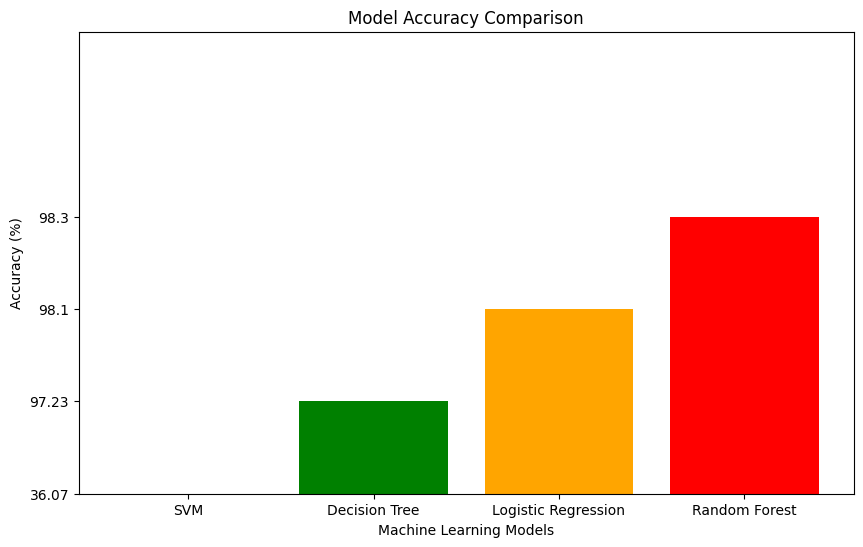

In [29]:
plt.figure(figsize=(10,6))
plt.bar(models,Accuracy,color=['blue','green','orange','red'])
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim([0,5])  # Accuracy range (0 to 1)


plt.show()